# Support Class 4

## 1. Kingman's Coalescent 

System of $L$ coalescing (merging) particles. Each pair of particles (total number of pairs is $\frac{L(L-1)}{2}$) coalesce independently at rate $1$.

Let $N_t$ be the number of particles at time $t$.

**Transition rates (e.g $g(n,m)$ for $n,m$ in state space)**
- recall from notes $g(x,x) = - \sum_{y \neq x} g(x,y)$

**Generator**
- every CTMC has a generator: 
    $$(G f)(x) = \sum_{y \in S, y \neq x} g(x,y) [ f(y) - f(x) ]$$

**Waiting Times (holding time)**
- For $X_0 = x$, define the waiting time $W_x := \inf\{ t>0 : X_t \neq x \}$, which is the first time you leave $x$
- $W_x \sim \exp(g(x,x))$ with $\mathbb{E}[W_x] = \frac{1}{|g(x,x)|}$
- If $|g(x,x)|>0$ then walk jumps to $y \neq x$ after time $W_x$ with probability $\frac{g(x,y)}{|g(x,x)|}$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1234)

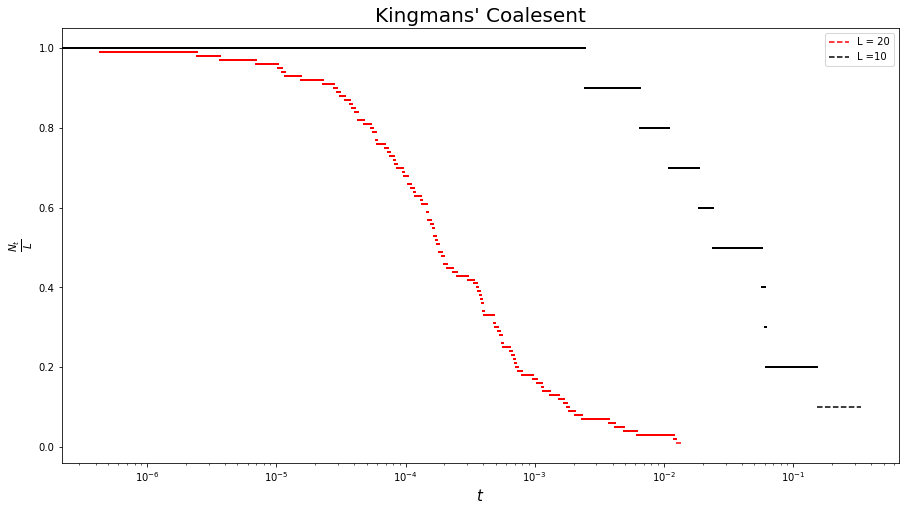

In [2]:
L = 100
t = 0


plt.figure(figsize=(15, 8))

for n in range(L, 1, -1):  
    num_particles = n * (n-1) / 2
    beta = 1 / num_particles
    wait_t = np.random.exponential(scale=beta)
    plt.plot([t/L, (t+wait_t)/L], [n/L, n/L], 'r', lw=2)
    t += wait_t

plt.plot([t/L, (t+2*wait_t)/L], [1/L, 1/L], 'r--', label='L = 20')


# try for fewer particles 
LL = 10
tt=0

for n in range(LL,1,-1):  
    num_particles = n * (n-1) / 2
    beta = 1 / num_particles
    wait_t = np.random.exponential(scale=beta)
    plt.plot([tt/LL, (tt+wait_t)/LL], [n/LL, n/LL], 'k', lw=2)
    tt += wait_t

plt.plot([tt/LL, (tt+2*wait_t)/LL], [1/LL,1/LL], 'k--', label='L =10') # also add this line
    
plt.title("Kingmans' Coalesent", fontsize=20)
plt.legend()
plt.xlabel(r"$t$", fontsize=15)
plt.ylabel(r'$\frac{N_t}{L}$', fontsize=15)

plt.yscale('linear')
plt.xscale('log')

## 2. Ornstein-Uhlenbeck Processes

Process $(X_t: t\geq 0)$ is a diffusion process with generator: 
$$ (\cal{Lf})(x) = -\alpha x f'(x) + \frac{1}{2} \sigma^2 f''(x), \  \alpha, \sigma^2 >0 $$

Given a function $f(X_t)$ we can calculate its expectation via
$$\frac{d}{dt}E[f(X_t)]=E[(Lf)(X_t)]\qquad$$

**Fokker-Planck Representation:** 
$$\frac{\partial \pi_t(y)}{\partial t}=-\alpha \frac{\partial}{\partial y}(y\pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}\pi_t(y)$$

This represents Orenstein-Uhlenbeck as a drift + diffusion term.

In general the Fokker-Planck equation is a master equation of the form: $$ \frac{\partial \pi_t(y)}{\partial t}= -\frac{\partial}{\partial y}(A(y) \pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}B(y) \pi_t(y)$$

Where $B(y)>0$. The FPE is linear is $A = A_0 + A_1y$ is a linear function of $y$ and $B$ is constant. If $A_1<0$ then the stationary solution is Guassian. 

### Simulation 

The **Ornstein–Uhlenbeck process** may also be described by a **stochastic differential equation**. The SDE shows the link between the stochastic and determinisitc parts.

$$dX_t=-\alpha X_t dt + \sigma dW_t$$
where $dX_t$ and $dt$ are infinitesimally small and $dW_t \sim N(0,dt)$ is the Wiener increment which is normally distributed with zero mean and variance $dt$.

If we use a simple finite difference approximation we have: $ X_{t+\Delta t}=X_t -\alpha X_t \Delta t+ \sigma \Delta W_t$
where $\Delta W_t \sim N(0,\Delta t)$

To numerically integrate a SDE, we need to install [sdeint](https://pypi.org/project/sdeint/).

**Lets simulate!**

### 2.1 Simulation by Hand

In [16]:
alpha = 1
sigma = 5
t_max = 40.0
dt = 0.01
x0 = 5 # set initial condition


ts = np.arange(0, t_max, dt)
length = len(times)

X = np.zeros(length)
X[0] = x0 
W = np.random.randn(length-1) * np.sqrt(dt)

for i in range(0, length-1):
    X[i+1] = X[i] - alpha*X[i]*dt + sigma*W[i]

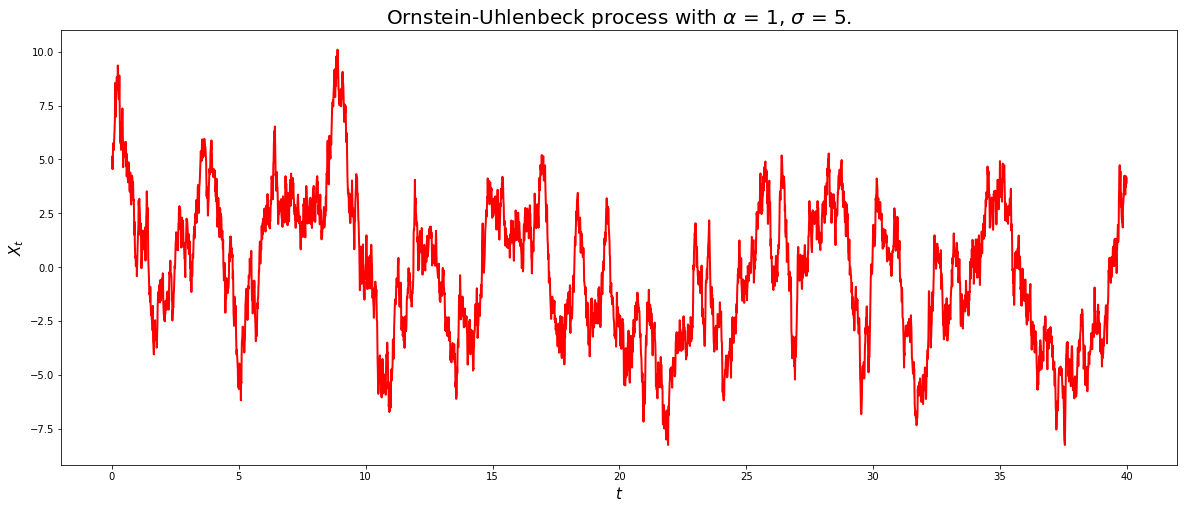

In [17]:
plt.figure(figsize=(20,8))
plt.plot(ts, X, 'r', lw=2)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$X_t$', fontsize=15)
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma), fontsize=20);

### 2.2 Numerical Integration

For Ito's equation: 
$$dy = f(y,t)dt + G(y,t) dW.$$

In this example, $f(X_t,t) = - \alpha X_t$ and $G(X_t,t) = \sigma$

In [18]:
import sdeint


def f(x, t):
    return -alpha * x


def G(x, t):
    return sigma * np.sin(t)

In [19]:
result = sdeint.itoint(f, G, x0, ts)

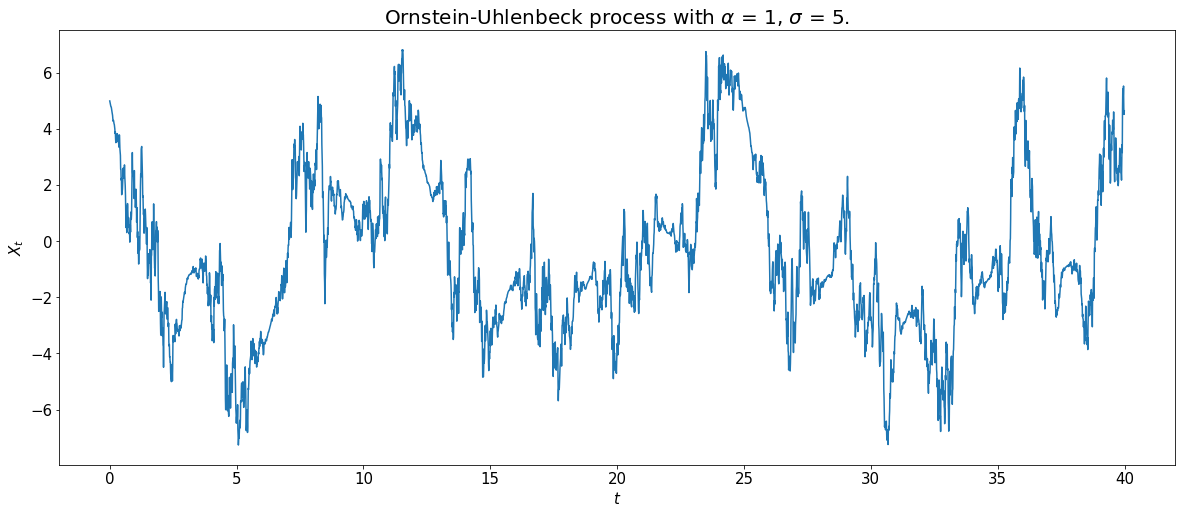

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(ts, result)
plt.xlabel('$t$', fontsize=15)
plt.ylabel('$X_t$', fontsize=15)
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma), fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

# Fractional Brownian Motion 

Fractal Brownian motion (fBm), is a generalization of Brownian motion
- the increments of fBm need not be independent
- fBm is a continuous-time Gaussian process $B_H(t)$ on [0, T]
- Expectation of $B_H(t)$ is zero for all t in [0, T]
- $B_H(t)$ covariance function: $\mathbb{E} \left( B_H(t) B_H(s) \right) = \frac{1}{2} \left( |t|^{2H} + |s|^{2H} - |t-s|^{2H} \right) $ where $H$ is the hurst index ($H \in (0,1)$)
- The increment process: $X(t) = B_H(t+1) − B_H(t)$, is known as fractional Gaussian noise (fGn)

Note that for the hurst index: 
- If $H = 1/2$ then the process is in fact a Brownian motion or Wiener process;
- If $H > 1/2$ then the increments of the process are positively correlated;
- If $H < 1/2$ then the increments of the process are negatively correlated.

## Simulation 
To simulate fBm, we need to install [fbm](https://pypi.org/project/fbm/), `sudo pip3 install fbm` for: 
- **Fractional Brownian Motion**: Exact methods for simulating fractional Brownian motion (fBm) or fractional Gaussian noise (fGn) in python.
- **Multifractional Brownian Motion**: Approximate simulation of multifractional Brownian motion (mBm) or multifractional Gaussian noise (mGn).


In [8]:
from fbm import FBM

In [9]:
# n is number of equispaced increments desired for a fBm
n = 1024
# hurst is 
hurst = 0.75
# length is hurst parameter on the interval [0, length]
# method can either be 'hosking', 'cholesky', or 'daviesharte'

# IMPORTANT: can fail is hurst is close to 1 or n is small
f = FBM(n=n, hurst=hurst, length=1, method='daviesharte')


# Generate a fBm realization
fbm_sample = f.fbm()

# Generate a fGn realization
fgn_sample = f.fgn()

# Get the times associated with the fBm
t_values = f.times()

In [11]:
f1 = FBM(n, hurst = 0.8)
f2 =FBM(n, hurst = 0.5)
f3 = FBM(n, hurst = 0.2)

(array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125]), <a list of 10 Text yticklabel objects>)

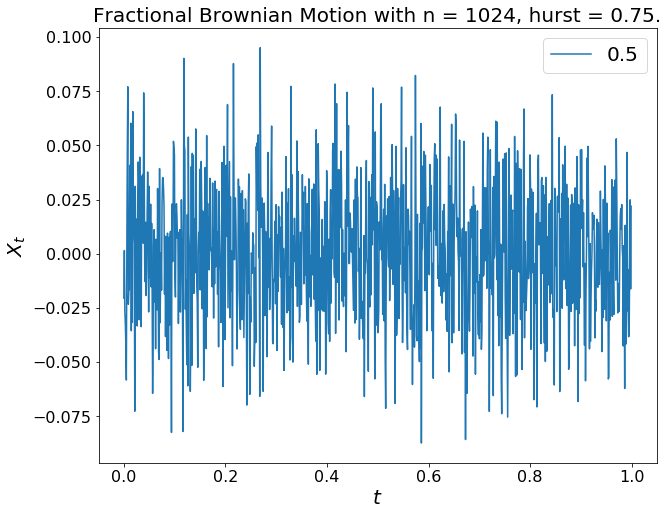

In [18]:
plt.figure(figsize=(10,8))
# plt.plot(t_values, fbm_sample, label = r'fBm $B_H(t)$')
# plt.plot(f3.times()[:n], f3.fgn(), label = r'0.2')
plt.plot(f2.times()[:n], f2.fgn(), label = r'0.5')
# plt.plot(f1.times()[:n], f1.fgn(), label = r'0.8')


# plt.plot(t_values[:n], fgn_sample, label =r'fGn $X(t)$')
plt.legend(fontsize=20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.title(r'Fractional Brownian Motion with n = {}, hurst = {}.'.format(n,hurst), fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)